# Libraries

In [25]:
from glucose_forecast import (
    data_cro2,
    data_validation,
    data_normalize,
    plot_measurements,
    forecast_windows,
    forecast_model,
    utils,
    metric_clarke,
    metric_calculation,
    plot_clarke,
    plot_summary
)

from glucose_forecast.config import config

In [6]:
import numpy as np
import pandas as pd

In [7]:
from itertools import product

In [8]:
import os

# Data load and validation

In [26]:
cro2 = data_cro2.get_cro2()
cro2.head()

,subject,timestamp,glucose_mg_dl,glucose_mmol_l,heart_rate
1,2001_SDMStrials@gmail.com - KF,0.00,104.516003,-0.045810,89.000000
2,2001_SDMStrials@gmail.com - KF,0.15,109.000000,-0.037408,87.009469
3,2001_SDMStrials@gmail.com - KF,0.30,111.000000,-0.032682,85.785449
4,2001_SDMStrials@gmail.com - KF,0.45,111.000000,-0.032682,88.076003
5,2001_SDMStrials@gmail.com - KF,0.60,108.000000,-0.039814,85.140396


In [27]:
data_validation.validate_data(cro2)

Intervals between timestamps are consistently             0.15.
Column data types are valid.
Rows are sorted by subject and timestamp


# Measurement plots

In [11]:
plot_measurements.generate_plots(
    cro2,
    #     show_plots=True
)

# Parameters

In [28]:
# Gettin parmeters from config

(start, end), step = config.training_window_range, config.training_window_step

predictor_combinations = utils.get_predictor_columns(["glucose_type"])
# parameters = {
#     "window": list(range(start, end + 1, step)),
#     "subject": cro2["subject"].unique(),
#     "predictors": predictor_combinations,
#     "model": config.model_parameters.keys(),
#     #     'error' = config.errors
# }


# A small number of parameter for testing
parameters = {
    "window": list(range(start, 52 + 1, step)),
    "subject": cro2["subject"].unique()[0:2],
    "predictors": predictor_combinations[0:2],
    "model": ['Decision Tree', 'LSTM'],
    #     'error' = config.errors
}


parameters

{'window': [48, 52],
 'subject': array(['2001_SDMStrials@gmail.com - KF', '2002_sdmstrails@gmail.com - FT'],
       dtype=object),
 'predictors': [['glucose_mg_dl'], ['glucose_mg_dl', 'heart_rate']],
 'model': ['Decision Tree', 'LSTM']}

# Windows

In [13]:
# Generate window data

for combination in product(
    parameters["subject"], parameters["predictors"], parameters["window"]
):
    subject, predictors, window = combination
    print(subject, predictors, window)
    
    windows_path = utils.prepare_directory("window_data")
    filename = utils.generate_file_name(subject, predictors, window, windows_path) + ".npz"    
    
    if not os.path.exists(filename):
        forecast_windows.create_window(cro2, subject, predictors, window)
    
    else:
        print(f"{filename} exists.\n")

# X, y = np.load(filename)["X"], np.load(filename)["y"]

  0%|          | 1/464 [00:00<01:30,  5.13it/s]

2001_SDMStrials@gmail.com - KF ['glucose_mg_dl'] 48


  8%|▊         | 38/464 [00:00<00:01, 372.45it/s]

2001_SDMStrials@gmail.com - KF ['glucose_mg_dl'] 52


  9%|▉         | 44/464 [00:00<00:00, 433.05it/s]

2001_SDMStrials@gmail.com - KF ['glucose_mg_dl', 'heart_rate'] 48


  6%|▌         | 28/464 [00:00<00:01, 276.71it/s]

2001_SDMStrials@gmail.com - KF ['glucose_mg_dl', 'heart_rate'] 52


  9%|▉         | 42/475 [00:00<00:01, 415.49it/s]

2002_sdmstrails@gmail.com - FT ['glucose_mg_dl'] 48


  8%|▊         | 39/475 [00:00<00:01, 389.24it/s]

2002_sdmstrails@gmail.com - FT ['glucose_mg_dl'] 52


  8%|▊         | 39/475 [00:00<00:01, 386.83it/s]

2002_sdmstrails@gmail.com - FT ['glucose_mg_dl', 'heart_rate'] 48


  9%|▉         | 45/475 [00:00<00:00, 449.08it/s]

2002_sdmstrails@gmail.com - FT ['glucose_mg_dl', 'heart_rate'] 52


100%|██████████| 475/475 [00:00<00:00, 480.14it/s]


# Forecast

In [14]:
# Run models and save predictons

forecasts_path = utils.prepare_directory("forecast")

for combination in product(
    parameters["subject"],
    parameters["predictors"],
    parameters["window"],
    parameters["model"],
):

    subject, predictors, window, model = combination
    pred_filename = f"{utils.generate_file_name(subject, predictors, window, forecasts_path, model)}.npy"

    if not os.path.exists(pred_filename):
        X, y = utils.load_window_data(subject, predictors, window)
        print(pred_filename)

        predictions, error = forecast_model.forecast(X, y, model, window, predictors)

        np.save(pred_filename, predictions)
    else:
        print(f"{pred_filename} exists.")

results/forecast/2001-KF_Glu_48_DecTre.npy
Fitting: Decision Tree
results/forecast/2001-KF_Glu_48_LSTM.npy
Fitting: LSTM
results/forecast/2001-KF_Glu_52_DecTre.npy
Fitting: Decision Tree
results/forecast/2001-KF_Glu_52_LSTM.npy
Fitting: LSTM
results/forecast/2001-KF_Glu-Hea_48_DecTre.npy
Fitting: Decision Tree
results/forecast/2001-KF_Glu-Hea_48_LSTM.npy
Fitting: LSTM
results/forecast/2001-KF_Glu-Hea_52_DecTre.npy
Fitting: Decision Tree
results/forecast/2001-KF_Glu-Hea_52_LSTM.npy
Fitting: LSTM
results/forecast/2002-FT_Glu_48_DecTre.npy
Fitting: Decision Tree
results/forecast/2002-FT_Glu_48_LSTM.npy
Fitting: LSTM
results/forecast/2002-FT_Glu_52_DecTre.npy
Fitting: Decision Tree
results/forecast/2002-FT_Glu_52_LSTM.npy
Fitting: LSTM
results/forecast/2002-FT_Glu-Hea_48_DecTre.npy
Fitting: Decision Tree
results/forecast/2002-FT_Glu-Hea_48_LSTM.npy
Fitting: LSTM
results/forecast/2002-FT_Glu-Hea_52_DecTre.npy
Fitting: Decision Tree
results/forecast/2002-FT_Glu-Hea_52_LSTM.npy
Fitting: LSTM


# RMSE and Clarke Errors

In [15]:
# Calculate and save error values and calculate error plots

results = utils.prepare_results()

for combination in product(
    parameters["subject"],
    parameters["predictors"],
    parameters["window"],
    parameters["model"],
):

    subject, predictors, window, model = combination

    combination_map = (
        (results["subject"] == subject)
        & (results["predictors"].astype(str) == str(predictors)) # Might work with numpy/pandas update
        & (results["window"] == window)  
        & (results["model"] == model)
    )

    if results[combination_map].shape[0] == 0:
        combination_results = pd.DataFrame(columns=config.result_columns)
        
        predictions = utils.load_predictions_data(subject, predictors, window, model)
        
        error = metric_calculation.get_rmse(predictions, subject, predictors, window)        
        y_test = metric_calculation.get_y_test(subject, predictors, window)
        
        clarke, zone = metric_clarke.generate_clarke_errors(
            y_test, predictions, window, config.forecasting_horizon
        )
        plot_clarke.create_clarke_plots(
            zone,
            y_test,
            predictions,
            subject,
            predictors,
            window,
            model,
            config.forecasting_horizon,
        )        
        
        
        combination_results = combination_results.append(
            {
                "subject": subject,
                "predictors": predictors,
                "window": window,
                "model": model,
                "error": error,
                "clarke": clarke,
                "zone": zone
            },
            ignore_index=True,
        )

        
        utils.save_results(combination_results)
        results = results.append(combination_results)

# Summary plots

In [16]:
from importlib import reload

reload(config)
reload(data_cro2)
reload(data_validation)
reload(data_normalize)
reload(forecast_windows)
reload(forecast_model)
reload(utils)
reload(metric_clarke)
reload(plot_clarke)
reload(plot_summary)
reload(plot_measurements)
reload(metric_calculation)

from glucose_forecast.config import config

2001_SDMStrials@gmail.com - KF: ['glucose_mg_dl']


<Figure size 432x288 with 0 Axes>

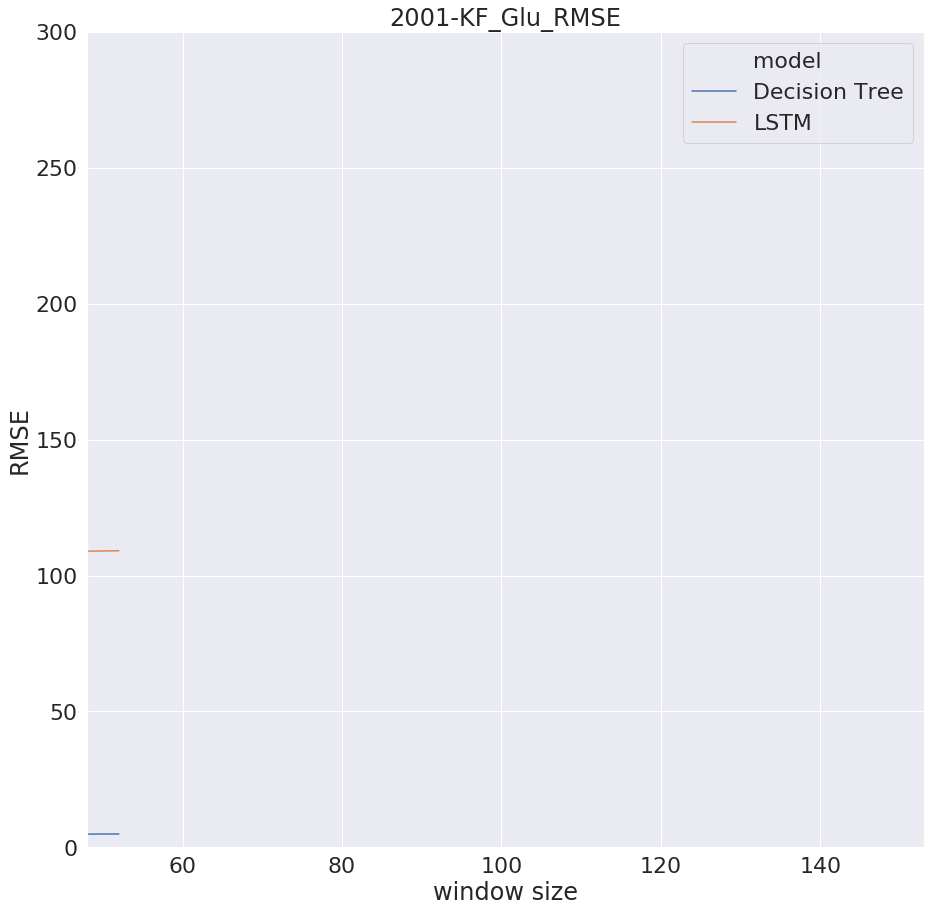

2001_SDMStrials@gmail.com - KF: ['glucose_mg_dl', 'heart_rate']


<Figure size 432x288 with 0 Axes>

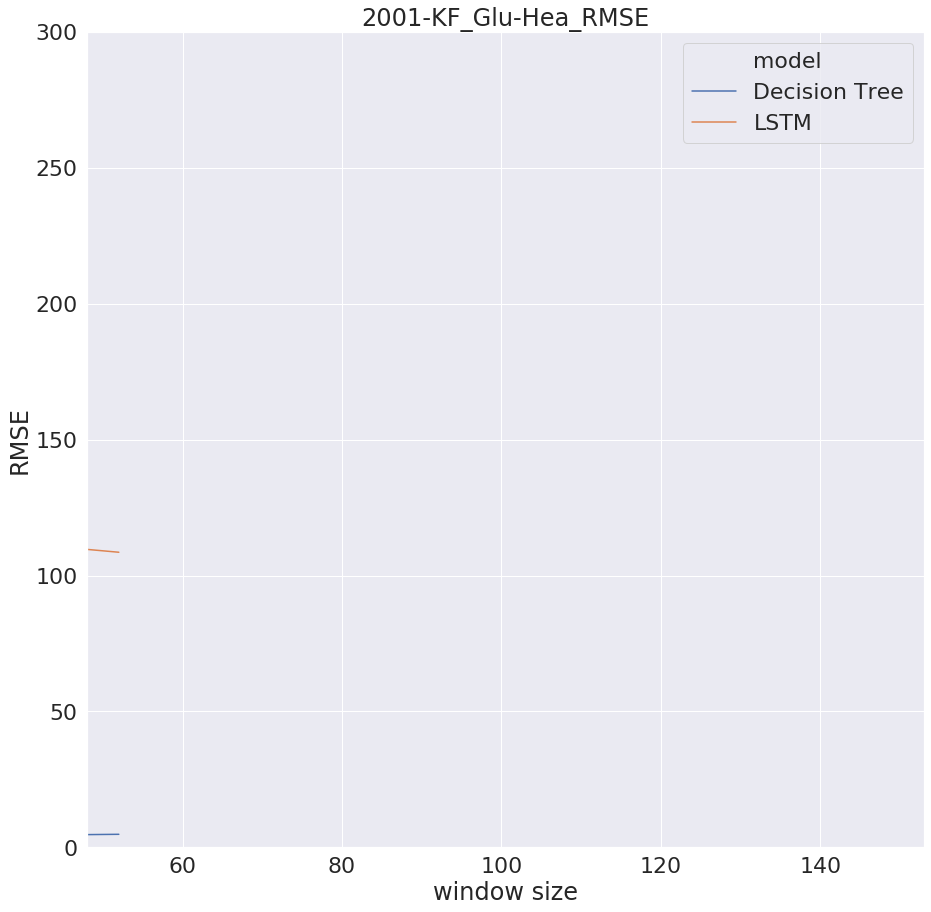

2002_sdmstrails@gmail.com - FT: ['glucose_mg_dl']


<Figure size 432x288 with 0 Axes>

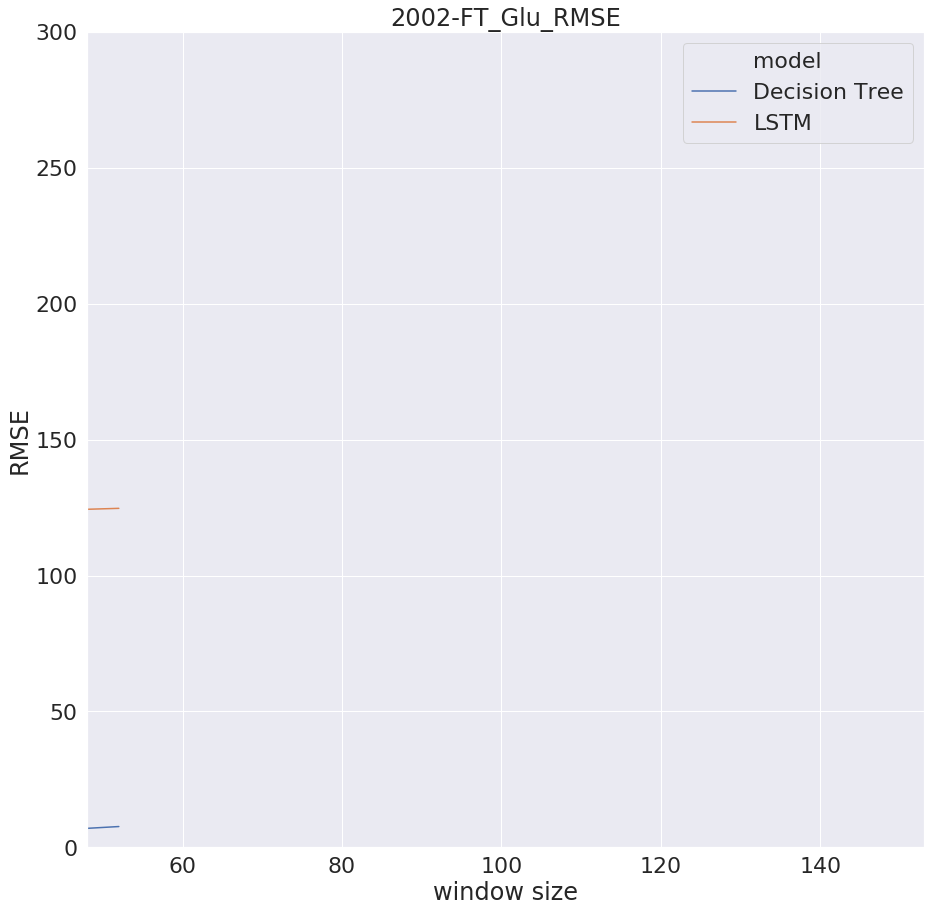

2002_sdmstrails@gmail.com - FT: ['glucose_mg_dl', 'heart_rate']


<Figure size 432x288 with 0 Axes>

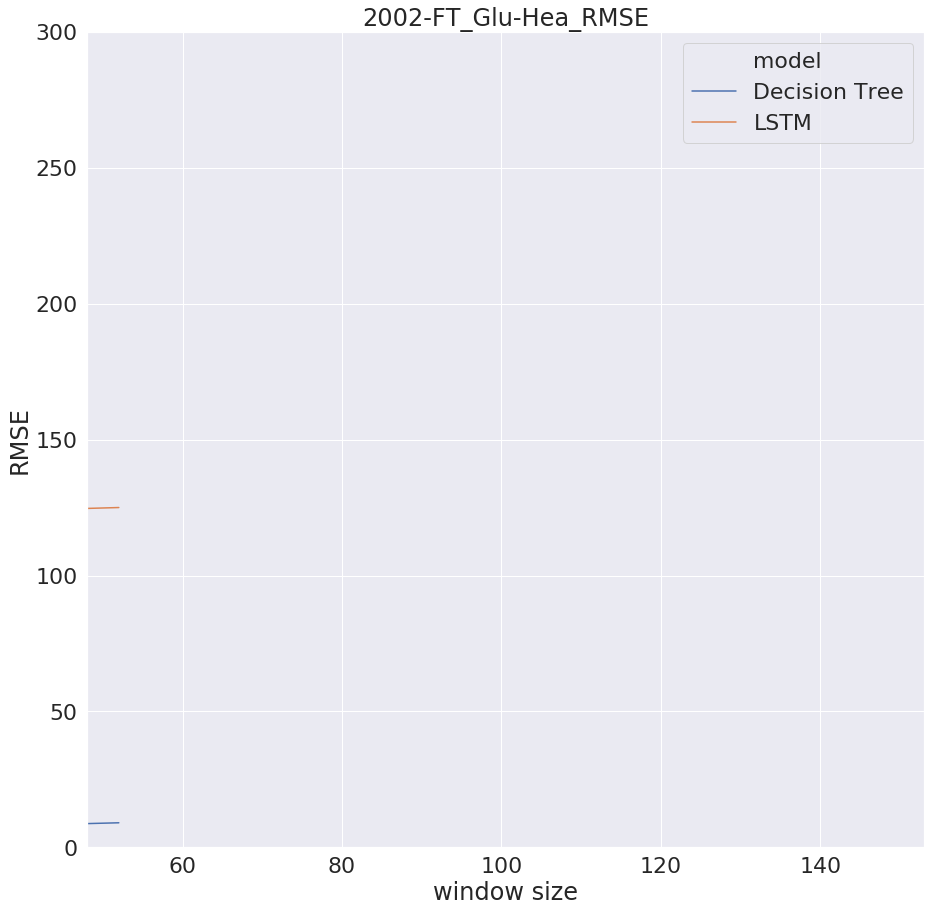

In [17]:
for combination in product(parameters["subject"], parameters["predictors"]):
    subject, predictors = combination
    print(f"{subject}: {predictors}")
    
    
    plot_summary.generate_plot(results, subject, predictors, show=True)

# Checking forecasts

In [18]:
# Generate example predictions

# # Run models and save predictons

# import pandas as pd
# import numpy as np
# import os

# windows_path = utils.prepare_directory("window_data")
# forecasts_path = utils.prepare_directory("forecast")

# from itertools import product

# for combination in product(
#     parameters["subject"],
#     parameters["predictors"],
#     parameters["window"],
#     parameters["model"],
# ):

#     subject, predictors, window, model = combination

#     pred_filename = f"{utils.generate_file_name(subject, predictors, window, forecasts_path, model)}.npy"

#     win_filename = (
#         f"{utils.generate_file_name(subject, predictors, window, windows_path)}.npz"
#     )

#     window_data = np.load(win_filename)
#     X, y = window_data["X"], window_data["y"]

#     print(pred_filename)
#     print(X)
#     print(y)
    
# #     breakpoint()
#     predictions, error = forecast_model.forecast(X, y, model, window, predictors)

In [19]:
# Compare LSTM with Decision Tree

# model_parameters = config.model_parameters

# X_train, y_train, X_test, y_test = forecast_model._train_test_split(X, y, train_size, test_size)
# X_train, X_test = forecast_model._normalize(X_train, X_test)


# model = 'Decision Tree'
# DT_pred = forecast_model._scikit_model(
#     model,
#     X_train,
#     y_train,
#     X_test,
#     multiregressor=model_parameters[model].get("multiregressor", False),
# )


# # X_train = X_train.reshape((-1, 1, window * len(predictors)))
# # X_test = X_test.reshape((-1, 1, window * len(predictors)))

# model = 'LSTM'
# LSTM_pred = forecast_model._keras_model(
#             model, X_train, y_train, X_test, window, predictors
#         )

# print(y_test[:5])
# print(DT_pred[:5])
# print(LSTM_pred[:5])

# y_test.shape, DT_pred.shape, LSTM_pred.shape

In [20]:
# A single Keras prediction attempt

# from keras import Sequential
# from keras.layers import LSTM
# from keras.layers.core import Dense, Dropout, Activation

# horizon = y_train.shape[1]

# X_train, y_train, X_test, y_test = forecast_model._train_test_split(X, y, train_size, test_size)
# X_train, X_test = forecast_model._normalize(X_train, X_test)

# # scaler = MinMaxScaler()

# # scaler.fit(X_train)
# # X_train = scaler.transform(X_train)
# # X_test = scaler.transform(X_test)
# # y_train = scaler.transform(X_train)

# X_train = X_train.reshape((-1, 1, window * len(predictors)))
# X_test = X_test.reshape((-1, 1, window * len(predictors)))


# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# model = Sequential()
# model.add(LSTM(56, input_shape=(1, len(predictors))))
# model.add(Dropout(rate=0.2))
# model.add(Dense(units=horizon))
# model.compile(loss="mse", optimizer="adam")
# model.fit(X_train, y_train)

# model.predict(X_test)

# Temp

In [21]:
# Adjusting the dataset

# a = pd.read_csv(f"results_{pd.datetime.now().isoformat()[:10]}.csv")

# a = a[~a.duplicated()]
# a = a[~a['Unnamed: 0'].isna()]


# first = a.loc[a['Unnamed: 0'].apply(lambda x: x.isnumeric()), ['subject', 'window', 'predictors', 'model', 'error']]

# second = a.loc[~a['Unnamed: 0'].apply(lambda x: x.isnumeric()), ['Unnamed: 0', 'subject', 'window', 'predictors', 'model']]
# second.columns = ['subject', 'window', 'predictors', 'model', 'error']


# b = pd.concat((first, second))
# b.to_csv(f"results_{pd.datetime.now().isoformat()[:10]}.csv", index=False)

In [22]:
# Checking memory

# tot_m, used_m, free_m = map(int, os.popen('free -t -m').readlines()[-1].split()[1:])

# tot_m, used_m, free_m


# import psutil

# pid = os.getpgid()
# py = psutil.Process(pid)
# memoryUse = py.memory_info()[0]/2.**30  # memory use in GB...I think
# print('memory use:', memoryUse)

In [23]:
# def calculateClarke(y_test, predicted, window, horizon, suffix, model):
#     """Original Clarke error plot function"""
#     # Calculates and plot clarke error for predicted data > horizon
#     i = window_size
#     first = list(predicted[0])
#     _y_test = list(y_test[0])
#     i = i + horizon
#     while i < y_test.shape[0] - horizon:
#         first = first + list(predicted[i])
#         _y_test = _y_test + list(y_test[i])
#         i = i + horizon

#     if not os.path.exists("Figures"):
#         os.makedirs("Figures")

#     plt, zone = clarke_error_grid(
#         _y_test, first, "Clarke_" + suffix + "_wSize_" + str(window_size)
#     )
#     plt.savefig(
#         os.path.join(
#             "Figures",
#             "Clarke "
#             + technique
#             + "Variables ["
#             + suffix
#             + "] j= "
#             + str(window_size)
#             + ".png",
#         )
#     )
#     plt.close()

#     labels = ["A", "B", "C", "D", "E"]
#     fig1, ax1 = plt.subplots()

#     ax1.pie(zone, labels=labels, shadow=True, autopct="%1.1f%%")
#     ax1.set_title("Clarke_" + suffix + "_wSize_" + str(window_size))
# #     plt.savefig(
# #         os.path.join(
# #             "Figures",
# #             "Clarke Pizza "
# #             + technique
# #             + "Variables ["
# #             + suffix
# #             + "] j= "
# #             + str(window_size)
# #             + ".png",
# #         )
# #     )
#     plt.close()

#     return ((zone[0] + zone[1]) / sum(zone)) * 100, zone

In [24]:
# def specialPlot(regr, X_test, y_test, window_size, horizon, suffix, technique):
#     """Original special plot generator function"""
#     # Plots the predicted and the y_test data when the horizon > 1 (by sequencing forecasts sets (window + horizon))
#     i = window_size
#     first = list(regr.predict(X_test[0].reshape(1, -1))[0, :])
#     _y_test = list(y_test[0])
#     i = i + horizon
#     while i < X_test.shape[0] - horizon:
#         first = first + list(regr.predict(X_test[i].reshape(1, -1))[0, :])
#         _y_test = _y_test + list(y_test[i])
#         i = i + horizon

#     plt.figure()

#     plt.plot(range(len(_y_test)), _y_test, label="Test Data")
#     plt.plot(range(len(_y_test)), first, color="red", label="Prediction")
#     pylab.xlabel("Sample")
#     pylab.ylabel("Y")
#     pylab.title("Variables [" + suffix + "] " + technique + " j= " + str(window_size))
#     plt.legend(loc=0)
#     plt.grid("on")

#     if not os.path.exists("Figures"):
#         os.makedirs("Figures")
#     plt.savefig(
#         os.path.join(
#             "Figures",
#             "Forecasting "
#             + technique
#             + "Variables ["
#             + suffix
#             + "] j= "
#             + str(window_size)
#             + ".png",
#         )
#     )
#     plt.close()